<a href="https://colab.research.google.com/github/rafiqul0396/LLM/blob/main/ML1/Regression/code/LinearRegressionStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-image

In [ ]:
%matplotlib inline

import time
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
from scipy import stats

from sklearn.linear_model import RANSACRegressor, LinearRegression, TheilSenRegressor
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet,BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import seaborn
from IPython.display import Image

In [ ]:
from sklearn import linear_model

In [ ]:
data=pd.read_csv("/content/concrete_data.csv")
data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
df=data.set_axis(['cement_component', 'furance_slag', 'flay_ash', 'water_component', 'superplasticizer','coarse_aggregate','fine_aggregate','age','concreate_strength'], axis=1)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,10.5))
plot_count=1
for features in list(df.columns)[:-1]:
    plt.subplot(3,3,plot_count)
    plt.scatter(df[features],df['concreate_strength'])
    plt.xlabel(features.replace('_'," ").title())
    plt.ylabel("concreate_strength")
    plot_count+=1

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing numerical columns
sns.set(style="ticks")  # Set the style

# Plot the pairplot
sns.pairplot(df)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_with_target(df, target_column, feature_columns):
    sns.set(style="whitegrid")

    num_features = len(feature_columns)
    rows = (num_features - 1) // 3 + 1
    cols = min(num_features, 3)

    plt.figure(figsize=(cols * 5, rows * 3.5))

    for i, feature in enumerate(feature_columns):
        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(x=feature, y=target_column, data=df)
        plt.xlabel(feature.replace('_', ' ').title())
        plt.ylabel(target_column.replace('_', ' ').title())

    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame containing the data
target_column = 'concreate_strength'
feature_columns = [col for col in df.columns if col != target_column]

plot_scatter_with_target(df, target_column, feature_columns)


In [ ]:
# Assuming 'df' is your DataFrame
correlations = df.corr(method='pearson')
print(correlations)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(12, 12), diagonal='hist')
plt.show()


In [ ]:
data_=df[(df.T!=0).any()]

In [ ]:
data_

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="ticks")  # Set the style

# Plot the pair plot
sns.pairplot(data_,vars=df.columns,kind='reg')
plt.show()


In [ ]:
from sklearn import preprocessing

In [ ]:
X=df['cement_component']
Y=df['concreate_strength']


In [ ]:
X = preprocessing.normalize([X])
Y=preprocessing.normalize([Y])

In [ ]:
X=X.flatten()

In [ ]:
Y=Y.flatten()


In [ ]:
Y.shape

In [ ]:
Y

In [ ]:
plt.scatter(X,Y)
plt.xlabel("cement_compont")
plt.ylabel("concreate_strength")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train=np.array(X_train).reshape(-1,1)
X_train[1:4]

In [ ]:
X_test=np.array(X_test).reshape(-1,1)
X_test[1:4]

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
 c=lr.intercept_
 c

In [ ]:
m=lr.coef_
m

In [ ]:
Y_pre_train=m*X_train+c
Y_pre_train.flatten()

In [ ]:
Y_pre_train1=lr.predict(X_train)
Y_pre_train1

In [ ]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,Y_pre_train1,color='red')
plt.show()

In [ ]:
Y_pre_test1=lr.predict(X_test)
Y_pre_test1

In [ ]:
plt.scatter(X_test,y_test)
plt.scatter(X_train,Y_pre_train1,color='red')
plt.scatter(X_test,Y_pre_test1,color='green')
plt.show()

In [ ]:
def predict(x, weights):
  # y^ = w1.x + w0
  y_hat = weights[1]*x + weights[0]
  return y_hat

In [ ]:
X.shape

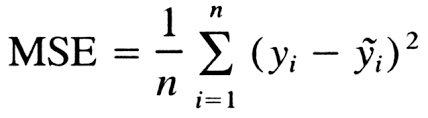

In [ ]:
def MSE(X, Y, weights):
  '''Implementation of MSE'''
  n = X.shape[0] # 1030

  total_err = 0.0
  for i in range(n): # for n datapoints
    y_hat = predict(X[i], weights) # y^ = w1.x + w0
    total_err += ( Y[i] - y_hat )**2 #(y-y^)**2

  return total_err/n

### optimation

In [ ]:
def gradient(X, Y, weights):
  n = X.shape[0] # 19820
  grad = np.zeros((2,))
  for i in range(n):
    y_hat = predict(X[i], weights)#y^
    grad[0] += (y_hat - Y[i])# y^ - dl/dw0
    grad[1] += (y_hat - Y[i])*X[i]#(y^ - dl/dw1)*x1

  return 2*grad/n #2/n

In [ ]:
weights =  np.random.randn(2,)
weights

In [ ]:
def gradient_descent(X, Y, n_itr = 1000, eta = 0.1):
  weights =  np.random.randn(2,)
  error_list = []
  for i in range(n_itr):
    e = MSE(X,Y, weights)
    error_list.append(e)
    grad = gradient(X, Y, weights)
    weights[0] = weights[0] - eta*grad[0] #w0 -eta*dl/dw0
    weights[1] = weights[1] - eta*grad[1] # w1 -eta*dl/dw1
  return weights.round(2), error_list

In [ ]:
opt_weights, error_list = gradient_descent(X, Y)
opt_weights

In [ ]:
plt.plot(error_list)


In [ ]:
plt.scatter(X, Y)
plt.xlabel("Model")
plt.ylabel("Price")
plt.plot([0.0, 0.050], [0.02, 0.042], c ='red')
plt.show()

In [ ]:
print(predict(0, opt_weights))
print(predict(0.050, opt_weights))